Name: Shubham Kumar

# Question 1 
You are part of a research team of a FinTech company dedicated to forecast the price direction of public US companies. Using the dataset at VTIreturns.csv, you must build a forecasting model of the VTI (market index)'s next day's return (ret) and its direction using the years 2015-2019 to train and 2020-2021 to test your model. 

The file VTIreturns.csv includes the following variables:

ret: Vanguard Total Stock Market ETF daily return based on adjusted daily closing prices.

Lag1-Lag5: LagX is X-lagged value of ret

5 factors of the Fama French model:

RM-Rf : market return minus risk free rate (market risk premium)

SMB: Small Minus Big (firm size): difference of average return on 9 small and 9 big stock portfolios

HML: High Minus Low (value): difference of average return on 2 value and 2 growth portfolios 

RMW (Robust Minus Weak):  difference of average return on 2 robust and 2 weak operating profitability portfolios 

CMA (Conservative Minus Aggressive):  difference of average return on 2 conservative and 2 aggressive investment portfolios

For this exercise you do not need to know the details of the Fama French model. However, further details and data can be obtained at:
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_factors.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html




## 1.  Read this csv file. Sort the variables by date in a new dataset. List the names of the variables in the dataset.


In [1241]:
import numpy as np
import pandas as pd
import time
import itertools
import statsmodels.api as sm
import seaborn as sn
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score
## Calling out all the libraries and functions which we need for the assignment

In [1242]:
df = pd.read_csv("C:/Users/kumar/Downloads/VTIreturns.csv",index_col=0).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1539 entries, 8/17/2015 to 9/30/2021
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ret     1539 non-null   float64
 1   RM-Rf   1539 non-null   float64
 2   SMB     1539 non-null   float64
 3   HML     1539 non-null   float64
 4   RMW     1539 non-null   float64
 5   CMA     1539 non-null   float64
 6   Lag1    1539 non-null   float64
 7   Lag2    1539 non-null   float64
 8   Lag3    1539 non-null   float64
 9   Lag4    1539 non-null   float64
 10  Lag5    1539 non-null   float64
dtypes: float64(11)
memory usage: 144.3+ KB


In [1243]:
sorted(df)

['CMA',
 'HML',
 'Lag1',
 'Lag2',
 'Lag3',
 'Lag4',
 'Lag5',
 'RM-Rf',
 'RMW',
 'SMB',
 'ret']

In [1244]:
df = df.sort_values(by='Date', ascending=True)
df.head()


,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5
Date,,,,,,,,,,,
1/10/2017,0.077039,0.16,0.93,0.44,0.02,0.05,-0.384586,0.316121,-0.196625,0.762990,0.760205
1/10/2018,-0.156225,-0.07,0.13,0.56,-0.32,0.02,0.184663,0.227704,0.585870,0.380495,0.577129
1/10/2019,0.490630,0.42,-0.01,-0.46,-0.05,-0.04,0.470241,1.023922,1.003490,3.256476,-2.344675
1/10/2020,-0.289674,-0.34,-0.26,-0.36,0.04,-0.08,0.622642,0.492372,-0.237391,0.341056,-0.638480
1/11/2016,-0.061243,-0.06,-0.61,0.38,0.69,0.33,-1.146819,-2.481559,-1.349267,0.223630,-1.506996


In [1245]:
df.sort_values(by='Date',ascending=True)

,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5
Date,,,,,,,,,,,
1/10/2017,0.077039,0.16,0.93,0.44,0.02,0.05,-0.384586,0.316121,-0.196625,0.762990,0.760205
1/10/2018,-0.156225,-0.07,0.13,0.56,-0.32,0.02,0.184663,0.227704,0.585870,0.380495,0.577129
1/10/2019,0.490630,0.42,-0.01,-0.46,-0.05,-0.04,0.470241,1.023922,1.003490,3.256476,-2.344675
1/10/2020,-0.289674,-0.34,-0.26,-0.36,0.04,-0.08,0.622642,0.492372,-0.237391,0.341056,-0.638480
1/11/2016,-0.061243,-0.06,-0.61,0.38,0.69,0.33,-1.146819,-2.481559,-1.349267,0.223630,-1.506996
...,...,...,...,...,...,...,...,...,...,...,...
9/9/2015,-1.378245,-1.34,0.18,0.13,0.22,0.02,2.494664,-1.433118,0.118634,1.867349,-2.979052
9/9/2016,-2.521311,-2.47,-0.56,0.41,0.04,-0.44,-0.257524,0.133125,0.284602,0.508958,0.053711
9/9/2019,0.059317,0.08,1.35,3.10,0.87,0.43,0.019777,1.327606,1.061405,-0.652960,-0.033540


## 2. Generate a new variable ret1 which is the return of the next day and ret_sq which is squared of ret. 



In [1246]:
df['ret1'] = df['ret']
df = df.assign(Direction=df.ret1.shift(-1))
print(df)

                ret  RM-Rf   SMB   HML   RMW   CMA      Lag1      Lag2  \
Date                                                                     
1/10/2017  0.077039   0.16  0.93  0.44  0.02  0.05 -0.384586  0.316121   
1/10/2018 -0.156225  -0.07  0.13  0.56 -0.32  0.02  0.184663  0.227704   
1/10/2019  0.490630   0.42 -0.01 -0.46 -0.05 -0.04  0.470241  1.023922   
1/10/2020 -0.289674  -0.34 -0.26 -0.36  0.04 -0.08  0.622642  0.492372   
1/11/2016 -0.061243  -0.06 -0.61  0.38  0.69  0.33 -1.146819 -2.481559   
...             ...    ...   ...   ...   ...   ...       ...       ...   
9/9/2015  -1.378245  -1.34  0.18  0.13  0.22  0.02  2.494664 -1.433118   
9/9/2016  -2.521311  -2.47 -0.56  0.41  0.04 -0.44 -0.257524  0.133125   
9/9/2019   0.059317   0.08  1.35  3.10  0.87  0.43  0.019777  1.327606   
9/9/2020   1.938611   2.07 -0.61 -1.99 -0.15 -0.21 -2.847885 -0.855380   
9/9/2021  -0.348649  -0.27  0.24  0.10 -0.78 -0.26 -0.236044 -0.432021   

               Lag3      Lag4      La

In [1247]:
df = df.assign(ret_sq=df.ret**2)
df

,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,Direction,ret_sq
Date,,,,,,,,,,,,,,
1/10/2017,0.077039,0.16,0.93,0.44,0.02,0.05,-0.384586,0.316121,-0.196625,0.762990,0.760205,0.077039,-0.156225,0.005935
1/10/2018,-0.156225,-0.07,0.13,0.56,-0.32,0.02,0.184663,0.227704,0.585870,0.380495,0.577129,-0.156225,0.490630,0.024406
1/10/2019,0.490630,0.42,-0.01,-0.46,-0.05,-0.04,0.470241,1.023922,1.003490,3.256476,-2.344675,0.490630,-0.289674,0.240717
1/10/2020,-0.289674,-0.34,-0.26,-0.36,0.04,-0.08,0.622642,0.492372,-0.237391,0.341056,-0.638480,-0.289674,-0.061243,0.083911
1/11/2016,-0.061243,-0.06,-0.61,0.38,0.69,0.33,-1.146819,-2.481559,-1.349267,0.223630,-1.506996,-0.061243,0.316073,0.003751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/9/2015,-1.378245,-1.34,0.18,0.13,0.22,0.02,2.494664,-1.433118,0.118634,1.867349,-2.979052,-1.378245,-2.521311,1.899560
9/9/2016,-2.521311,-2.47,-0.56,0.41,0.04,-0.44,-0.257524,0.133125,0.284602,0.508958,0.053711,-2.521311,0.059317,6.357009
9/9/2019,0.059317,0.08,1.35,3.10,0.87,0.43,0.019777,1.327606,1.061405,-0.652960,-0.033540,0.059317,1.938611,0.003518


## 3. What is the mean and standard deviation of each variable? Create a simple table of the means and standard deviations.



In [1248]:
df.describe()

,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,Direction,ret_sq
count,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1538.000000,1539.000000
mean,0.054173,0.056615,0.000884,-0.017186,0.009461,-0.004418,0.055126,0.054993,0.056435,0.055988,0.056716,0.054173,0.054158,1.389276
std,1.177813,1.189073,0.695138,0.907731,0.455677,0.394264,1.177481,1.177492,1.176188,1.176423,1.176808,1.177813,1.178196,6.388202
min,-12.082221,-12.000000,-4.570000,-4.950000,-1.820000,-2.290000,-12.082221,-12.082221,-12.082221,-12.082221,-12.082221,-12.082221,-12.082221,0.000000
25%,-0.315907,-0.340000,-0.380000,-0.450000,-0.260000,-0.230000,-0.314130,-0.314130,-0.309273,-0.314130,-0.314130,-0.315907,-0.316073,0.032625
50%,0.078330,0.080000,-0.020000,-0.050000,0.000000,-0.020000,0.079878,0.079878,0.080282,0.080282,0.080282,0.078330,0.079104,0.197693
75%,0.567944,0.580000,0.380000,0.390000,0.265000,0.200000,0.567944,0.567944,0.567944,0.567944,0.568730,0.567944,0.568294,0.860239
max,9.066106,9.340000,5.740000,6.750000,1.920000,2.460000,9.066106,9.066106,9.066106,9.066106,9.066106,9.066106,9.066106,145.980066


In [1249]:
df.describe().loc[['mean','std']]

,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,Direction,ret_sq
mean,0.054173,0.056615,0.000884,-0.017186,0.009461,-0.004418,0.055126,0.054993,0.056435,0.055988,0.056716,0.054173,0.054158,1.389276
std,1.177813,1.189073,0.695138,0.907731,0.455677,0.394264,1.177481,1.177492,1.176188,1.176423,1.176808,1.177813,1.178196,6.388202


In [1250]:
df.dropna(subset = ['ret', 'RM-Rf', 'SMB', 'HML', 'RMW', 'CMA', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'ret1', 'ret_sq'], inplace=True)

## 4. Explore the distribution of the main variables of this dataset and the relationship with the variable return using graphs and/or statistical values. Discuss your results



In [1251]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [1252]:
#Ignoring the warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [1253]:
corrMatrix = df.corr()
## Defining correlation matrix
corrMatrix
## Printing Correlation matrix

,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,Direction,ret_sq
ret,1.000000,0.995373,0.181922,0.124913,-0.055189,-0.166144,-0.178272,0.144936,-0.008519,-0.083462,0.079995,1.000000,0.003104,-0.219090
RM-Rf,0.995373,1.000000,0.181033,0.105519,-0.065914,-0.180885,-0.194034,0.148855,-0.021397,-0.084519,0.073272,0.995373,0.001577,-0.196181
SMB,0.181922,0.181033,1.000000,0.370778,-0.151239,0.128996,-0.007548,0.101957,-0.082113,0.071913,0.031006,0.181922,-0.012156,-0.111795
HML,0.124913,0.105519,0.370778,1.000000,0.305310,0.533901,0.031763,0.039566,-0.003681,-0.032157,0.028071,0.124913,0.003551,-0.045767
RMW,-0.055189,-0.065914,-0.151239,0.305310,1.000000,0.244683,-0.016145,-0.002986,-0.040135,0.007816,0.042910,-0.055189,0.024161,0.043458
CMA,-0.166144,-0.180885,0.128996,0.533901,0.244683,1.000000,0.067823,-0.022730,0.059413,0.006843,0.031060,-0.166144,-0.012279,0.065560
Lag1,-0.178272,-0.194034,-0.007548,0.031763,-0.016145,0.067823,1.000000,-0.178344,0.143978,-0.008814,-0.083244,-0.178272,0.006461,-0.092827
Lag2,0.144936,0.148855,0.101957,0.039566,-0.002986,-0.022730,-0.178344,1.000000,-0.178532,0.144037,-0.008919,0.144936,0.032596,-0.211662
Lag3,-0.008519,-0.021397,-0.082113,-0.003681,-0.040135,0.059413,0.143978,-0.178532,1.000000,-0.178995,0.144240,-0.008519,0.011365,-0.134931
Lag4,-0.083462,-0.084519,0.071913,-0.032157,0.007816,0.006843,-0.008814,0.144037,-0.178995,1.000000,-0.179427,-0.083462,-0.004514,-0.152524


<AxesSubplot:>

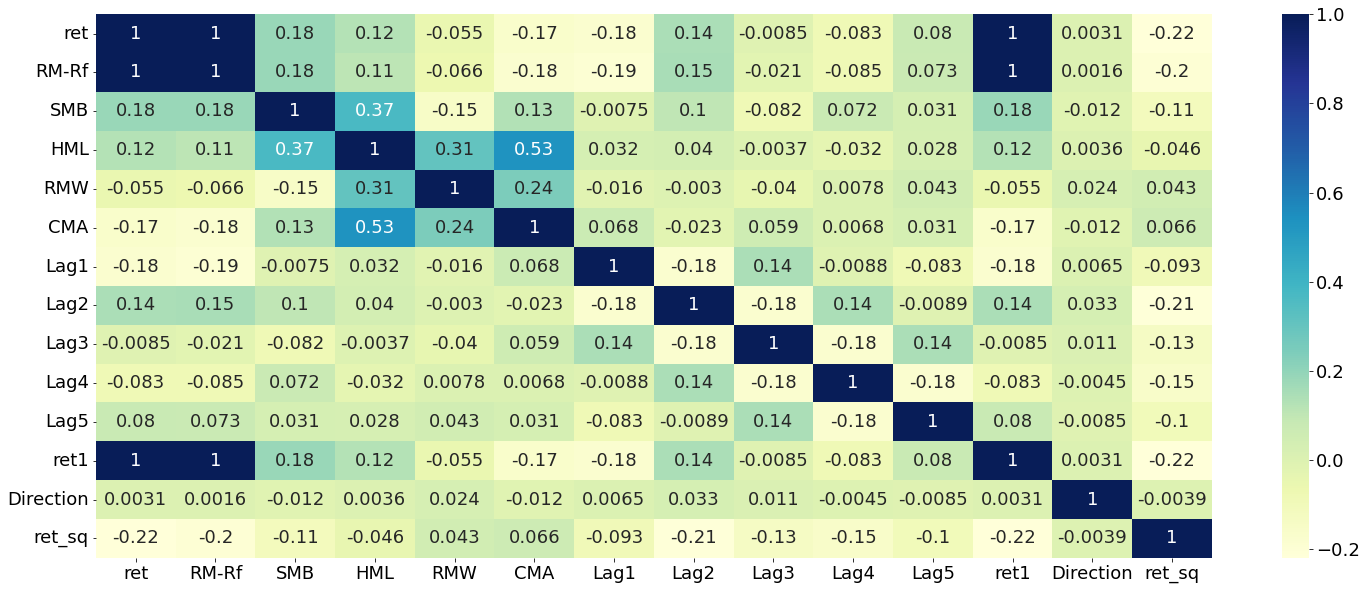

In [1254]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

## 5.a  Split your data into a training set (until 2019) and a testing set (2020-21). Using the training sample, regress next day return on the remaining variables (removing DATE).

In [1255]:
import statsmodels.formula.api as smf

In [1256]:
df.dropna()

,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,Direction,ret_sq
Date,,,,,,,,,,,,,,
1/10/2017,0.077039,0.16,0.93,0.44,0.02,0.05,-0.384586,0.316121,-0.196625,0.762990,0.760205,0.077039,-0.156225,0.005935
1/10/2018,-0.156225,-0.07,0.13,0.56,-0.32,0.02,0.184663,0.227704,0.585870,0.380495,0.577129,-0.156225,0.490630,0.024406
1/10/2019,0.490630,0.42,-0.01,-0.46,-0.05,-0.04,0.470241,1.023922,1.003490,3.256476,-2.344675,0.490630,-0.289674,0.240717
1/10/2020,-0.289674,-0.34,-0.26,-0.36,0.04,-0.08,0.622642,0.492372,-0.237391,0.341056,-0.638480,-0.289674,-0.061243,0.083911
1/11/2016,-0.061243,-0.06,-0.61,0.38,0.69,0.33,-1.146819,-2.481559,-1.349267,0.223630,-1.506996,-0.061243,0.316073,0.003751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/8/2021,-0.236044,-0.34,-0.72,0.05,0.78,0.16,-0.432021,-0.034138,0.337640,0.175681,-0.188525,-0.236044,-1.378245,0.055717
9/9/2015,-1.378245,-1.34,0.18,0.13,0.22,0.02,2.494664,-1.433118,0.118634,1.867349,-2.979052,-1.378245,-2.521311,1.899560
9/9/2016,-2.521311,-2.47,-0.56,0.41,0.04,-0.44,-0.257524,0.133125,0.284602,0.508958,0.053711,-2.521311,0.059317,6.357009


In [1257]:
df_y = pd.DataFrame(df['ret1'])
df_x = df[['HML','Lag1','Lag2','Lag3','Lag4','Lag5','RM-Rf','RMW','SMB','CMA',
           'ret']]

In [1258]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train , y_test=train_test_split(df_x,df_y,test_size=0.4, random_state=10)

In [1259]:
X_train.head()

,HML,Lag1,Lag2,Lag3,Lag4,Lag5,RM-Rf,RMW,SMB,CMA,ret
Date,,,,,,,,,,,
12/18/2020,-1.19,0.781328,0.140344,1.361705,-0.284340,-0.178623,-0.12,-0.41,-0.17,-0.76,-0.283885
4/17/2018,-1.17,0.831190,-0.285130,0.806346,-0.462649,1.609969,1.09,-0.24,0.01,-0.40,1.047384
8/25/2020,-0.63,0.953501,0.249998,0.285633,-0.390351,0.151298,0.36,-0.44,-0.02,-0.69,0.333041
4/30/2018,-0.09,0.065586,0.944369,0.110406,-1.207715,-0.036352,-0.80,-0.42,-0.06,-0.06,-0.730828
3/20/2017,-0.72,-0.057091,-0.122230,0.899869,-0.360916,0.073706,-0.25,-0.15,-0.20,-0.05,-0.236891


In [1260]:
y_train.head()

,ret1
Date,
12/18/2020,-0.283885
4/17/2018,1.047384
8/25/2020,0.333041
4/30/2018,-0.730828
3/20/2017,-0.236891


In [1261]:
df=df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [1262]:
X_train = df[:'2019'][['Lag1','Lag2']]
y_train = df[:'2019']['ret1']

X_test = df['2020':][['Lag1','Lag2']]
y_test = df['2020':]['ret1']

#lda = LDA()
#model = lda.fit(X_train, y_train)
#print(model.priors_)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)#Fit the model over the training dataset

In [1263]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [1264]:
print(model.intercept_)
print(model.coef_)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)#Calculate root mean squared error to evaluate model performance
from sklearn.metrics import mean_squared_error
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,predictions)))

[0.04243342]
[[0.04298532 0.06005764]]
MSE :  1.693205828013786
RMSE :  1.301232426591724


In [1265]:
date = df.drop(columns=['ret1'], axis=1)
print(date)

                ret  RM-Rf   SMB   HML   RMW   CMA      Lag1      Lag2  \
Date                                                                     
1/10/2017  0.077039   0.16  0.93  0.44  0.02  0.05 -0.384586  0.316121   
1/10/2018 -0.156225  -0.07  0.13  0.56 -0.32  0.02  0.184663  0.227704   
1/10/2019  0.490630   0.42 -0.01 -0.46 -0.05 -0.04  0.470241  1.023922   
1/10/2020 -0.289674  -0.34 -0.26 -0.36  0.04 -0.08  0.622642  0.492372   
1/11/2016 -0.061243  -0.06 -0.61  0.38  0.69  0.33 -1.146819 -2.481559   
...             ...    ...   ...   ...   ...   ...       ...       ...   
9/8/2021  -0.236044  -0.34 -0.72  0.05  0.78  0.16 -0.432021 -0.034138   
9/9/2015  -1.378245  -1.34  0.18  0.13  0.22  0.02  2.494664 -1.433118   
9/9/2016  -2.521311  -2.47 -0.56  0.41  0.04 -0.44 -0.257524  0.133125   
9/9/2019   0.059317   0.08  1.35  3.10  0.87  0.43  0.019777  1.327606   
9/9/2020   1.938611   2.07 -0.61 -1.99 -0.15 -0.21 -2.847885 -0.855380   

               Lag3      Lag4      La

### b. Print a table showing what variables would be selected using best subset selection for all predictors of the training set. Determine the optimal model using Mallows' Cp and output the model, including its coefficients.



In [1266]:
import itertools
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

In [1267]:
mallow_df = pd.read_csv('C:/Users/kumar/Downloads/VTIreturns.csv',index_col=0,na_values='?').dropna()
mallow_df.head(10)

,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5
Date,,,,,,,,,,,
8/17/2015,0.635918,0.60,0.36,-0.85,-0.22,-0.37,0.379802,-0.139131,0.102001,-0.905078,1.239611
8/18/2015,-0.257553,-0.35,-0.61,0.37,0.37,0.03,0.635918,0.379802,-0.139131,0.102001,-0.905078
8/19/2015,-0.897452,-0.85,-0.20,-0.21,-0.10,-0.03,-0.257553,0.635918,0.379802,-0.139131,0.102001
8/20/2015,-2.198697,-2.24,-0.23,0.56,0.63,0.53,-0.897452,-0.257553,0.635918,0.379802,-0.139131
8/21/2015,-2.920836,-2.95,1.80,0.16,-0.73,0.74,-2.198697,-0.897452,-0.257553,0.635918,0.379802
8/24/2015,-4.103392,-3.90,0.29,-0.40,0.45,0.09,-2.920836,-2.198697,-0.897452,-0.257553,0.635918
8/25/2015,-1.199612,-1.17,0.58,-0.62,-0.28,-0.55,-4.103392,-2.920836,-2.198697,-0.897452,-0.257553
8/26/2015,3.566396,3.68,-1.41,-0.36,0.18,-0.59,-1.199612,-4.103392,-2.920836,-2.198697,-0.897452
8/27/2015,2.389840,2.40,-0.63,0.60,-0.31,-0.13,3.566396,-1.199612,-4.103392,-2.920836,-2.198697


In [1268]:
print("Number of null values:", mallow_df['ret'].isnull().sum())

Number of null values: 0


In [1269]:
mallow_df = mallow_df.dropna().drop('ret', axis=1)

In [1270]:
dummies = pd.get_dummies(mallow_df[['SMB', 'HML', 'RM-Rf']])

y = mallow_df.Lag1



# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X = mallow_df.drop(['Lag1', 'SMB', 'HML', 'RM-Rf'], axis=1).astype('float64')



In [1271]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [1272]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS Indicators
    best_model = models.loc[models["RSS"].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [1273]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_best.loc[i] = getBest(i)
    predictors = models_best.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 6 models on 1 predictors in 0.011001825332641602 seconds.
Processed 15 models on 2 predictors in 0.021503686904907227 seconds.
Processed 20 models on 3 predictors in 0.02950572967529297 seconds.
Processed 15 models on 4 predictors in 0.02500438690185547 seconds.
Processed 6 models on 5 predictors in 0.010001182556152344 seconds.
Processed 1 models on 6 predictors in 0.0030012130737304688 seconds.
Total elapsed time: 0.10801863670349121 seconds.


In [1274]:
models_best

,RSS,model
1,2071.029886,<statsmodels.regression.linear_model.Regressio...
2,2041.874805,<statsmodels.regression.linear_model.Regressio...
3,2020.384772,<statsmodels.regression.linear_model.Regressio...
4,2012.942804,<statsmodels.regression.linear_model.Regressio...
5,2012.001512,<statsmodels.regression.linear_model.Regressio...
6,2011.059283,<statsmodels.regression.linear_model.Regressio...


In [1275]:
print(models_best.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                   Lag1   R-squared (uncentered):                   0.045
Model:                            OLS   Adj. R-squared (uncentered):              0.043
Method:                 Least Squares   F-statistic:                              35.82
Date:                Sat, 12 Mar 2022   Prob (F-statistic):                    6.22e-16
Time:                        14:43:38   Log-Likelihood:                         -2401.3
No. Observations:                1539   AIC:                                      4807.
Df Residuals:                    1537   BIC:                                      4817.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### c. Print a table showing what variables would be selected using forward subset selection for all predictors of the training set. Determine the optimal model using BIC and output the model, including its coefficients.



In [1276]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

1    0.030896
2    0.044538
3    0.054594
4    0.058076
5    0.058517
6    0.058958
dtype: float64

Text(0, 0.5, 'BIC')

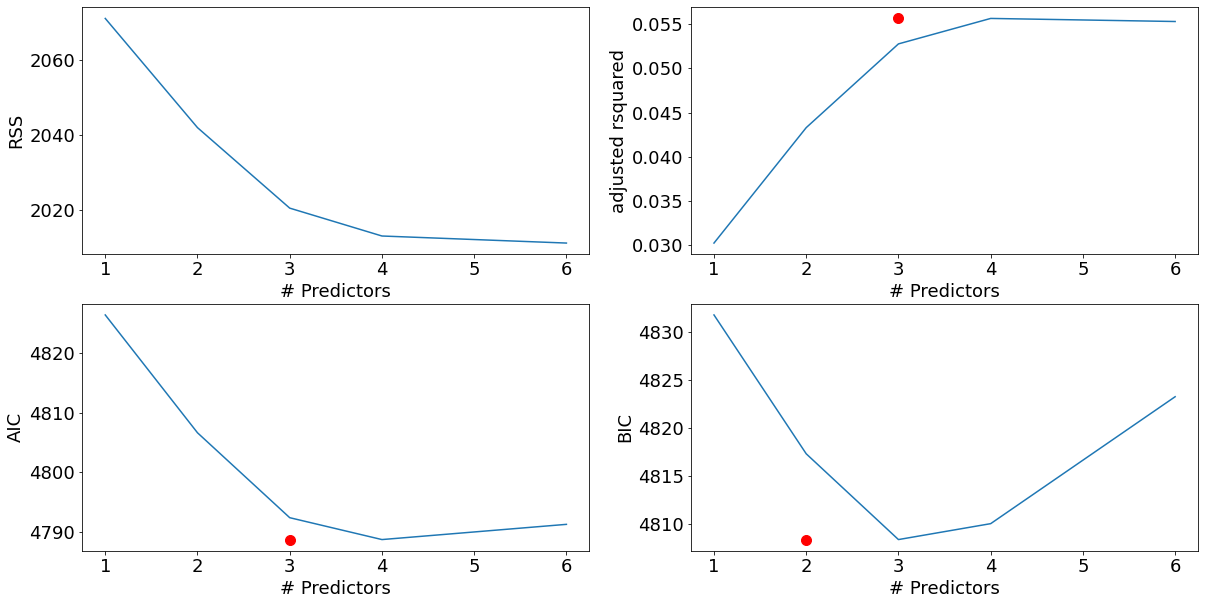

In [1277]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [1278]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [1279]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  6 models on 1 predictors in 0.013002157211303711 seconds.
Processed  5 models on 2 predictors in 0.008501052856445312 seconds.
Processed  4 models on 3 predictors in 0.007001638412475586 seconds.
Processed  3 models on 4 predictors in 0.0060002803802490234 seconds.
Processed  2 models on 5 predictors in 0.004500865936279297 seconds.
Processed  1 models on 6 predictors in 0.002500772476196289 seconds.
Total elapsed time: 0.04900860786437988 seconds.


In [1280]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                   Lag1   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):              0.030
Method:                 Least Squares   F-statistic:                              49.03
Date:                Sat, 12 Mar 2022   Prob (F-statistic):                    3.75e-12
Time:                        14:43:38   Log-Likelihood:                         -2412.2
No. Observations:                1539   AIC:                                      4826.
Df Residuals:                    1538   BIC:                                      4832.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [1281]:
print(models_best.loc[6, "model"].summary())
print(models_fwd.loc[6, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                   Lag1   R-squared (uncentered):                   0.059
Model:                            OLS   Adj. R-squared (uncentered):              0.055
Method:                 Least Squares   F-statistic:                              16.01
Date:                Sat, 12 Mar 2022   Prob (F-statistic):                    6.31e-18
Time:                        14:43:38   Log-Likelihood:                         -2389.6
No. Observations:                1539   AIC:                                      4791.
Df Residuals:                    1533   BIC:                                      4823.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### d. Print a table showing what variables would be selected using backward subset selection for all predictors of the training set. Determine the optimal model using adjusted R^2 and output the model, including its coefficients.



In [1282]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [1283]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  6 models on 5 predictors in 0.011501789093017578 seconds.
Processed  5 models on 4 predictors in 0.009502172470092773 seconds.
Processed  4 models on 3 predictors in 0.007001161575317383 seconds.
Processed  3 models on 2 predictors in 0.00600123405456543 seconds.
Processed  2 models on 1 predictors in 0.003500699996948242 seconds.
Total elapsed time: 0.040007829666137695 seconds.


In [1284]:
models_best.loc[2, "model"].rsquared

0.04453823935457446

In [1285]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[6, "model"].params)


------------
Best Subset:
------------
RMW    -0.056448
CMA     0.191453
Lag2   -0.154896
Lag3    0.132385
Lag4    0.021783
Lag5   -0.098369
dtype: float64


In [1286]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[6, "model"].params)

-----------------
Foward Selection:
-----------------
Lag2   -0.154896
Lag3    0.132385
Lag5   -0.098369
CMA     0.191453
RMW    -0.056448
Lag4    0.021783
dtype: float64


## 6.a.  Using the training sample, fit a Ridge regression model with all the variables to forecast excess return.  Create a graph with the diferent values of lambda and the coefficients. Fit a Ridge regression model with a 10-fold cross-validation to choose the tuning parameter lambda. Print the value of the coefficients. Using the best lambda and the test sample, predict next day excess return and calculate the mean squared error.



In [1287]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [1288]:
ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 6)

Text(0, 0.5, 'weights')

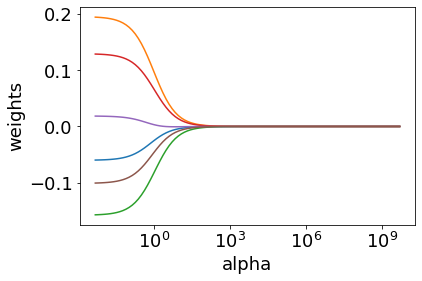

In [1289]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

### b. Fit a Lasso regression model with a 10-fold cross-validation to choose the tuning parameter lambda. Print the value of the coefficients. Using the best lambda and the test sample, predict next day excess return and calculate the mean squared error.



In [1290]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0023498744141448595, normalize=True)

Text(0, 0.5, 'weights')

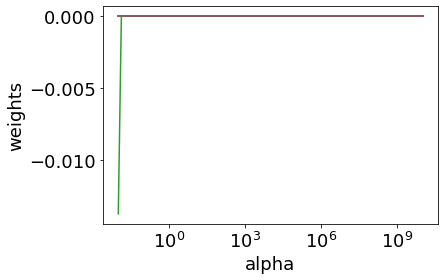

In [1291]:
lasso = Lasso(max_iter=1000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X),y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [1292]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

1.6840824796613374

### c. Compare and discuss the results of Lasso and Ridge regression indicating what approach you will choose and why.


Ridge regression is what I will prefer to predict the models as the data contains more predictor variables than the observations. 

# Question 2 

# Create another field "Direction" in this data frame that looks to the direction of the return of the next period (ret1). After "Direction" is created, ret1 should not be included in the dataset.
  
## 1. Using the training set, run LDA to forecast "Direction."  Predict with the test sample. Calculate the confusion matrix and accuracy.

In [1293]:
df['Direction'] = df['ret1']
df = df.assign(Direction=df.ret1.shift(-1))

In [1294]:
df_2 = df.drop('ret1', axis=1)
df_2 = df_2.dropna()
df_2

,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,Direction,ret_sq
Date,,,,,,,,,,,,,
1/10/2017,0.077039,0.16,0.93,0.44,0.02,0.05,-0.384586,0.316121,-0.196625,0.762990,0.760205,-0.156225,0.005935
1/10/2018,-0.156225,-0.07,0.13,0.56,-0.32,0.02,0.184663,0.227704,0.585870,0.380495,0.577129,0.490630,0.024406
1/10/2019,0.490630,0.42,-0.01,-0.46,-0.05,-0.04,0.470241,1.023922,1.003490,3.256476,-2.344675,-0.289674,0.240717
1/10/2020,-0.289674,-0.34,-0.26,-0.36,0.04,-0.08,0.622642,0.492372,-0.237391,0.341056,-0.638480,-0.061243,0.083911
1/11/2016,-0.061243,-0.06,-0.61,0.38,0.69,0.33,-1.146819,-2.481559,-1.349267,0.223630,-1.506996,0.316073,0.003751
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/8/2020,-2.847885,-2.91,0.88,-0.23,-0.68,-0.58,-0.855380,-3.537900,1.327455,0.881709,-0.225362,-0.236044,8.110452
9/8/2021,-0.236044,-0.34,-0.72,0.05,0.78,0.16,-0.432021,-0.034138,0.337640,0.175681,-0.188525,-1.378245,0.055717
9/9/2015,-1.378245,-1.34,0.18,0.13,0.22,0.02,2.494664,-1.433118,0.118634,1.867349,-2.979052,-2.521311,1.899560


In [1295]:
df_2.isna().sum()

ret          0
RM-Rf        0
SMB          0
HML          0
RMW          0
CMA          0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Direction    0
ret_sq       0
dtype: int64

In [1296]:
df = df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [1297]:
df.isnull()

,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,Direction,ret_sq
Date,,,,,,,,,,,,,,
1/10/2017,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1/10/2018,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1/10/2019,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1/10/2020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1/11/2016,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/8/2020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9/8/2021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9/9/2015,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1298]:
X= df.drop(columns=['ret1'], axis=1)
print(X)

                ret  RM-Rf   SMB   HML   RMW   CMA      Lag1      Lag2  \
Date                                                                     
1/10/2017  0.077039   0.16  0.93  0.44  0.02  0.05 -0.384586  0.316121   
1/10/2018 -0.156225  -0.07  0.13  0.56 -0.32  0.02  0.184663  0.227704   
1/10/2019  0.490630   0.42 -0.01 -0.46 -0.05 -0.04  0.470241  1.023922   
1/10/2020 -0.289674  -0.34 -0.26 -0.36  0.04 -0.08  0.622642  0.492372   
1/11/2016 -0.061243  -0.06 -0.61  0.38  0.69  0.33 -1.146819 -2.481559   
...             ...    ...   ...   ...   ...   ...       ...       ...   
9/8/2020  -2.847885  -2.91  0.88 -0.23 -0.68 -0.58 -0.855380 -3.537900   
9/8/2021  -0.236044  -0.34 -0.72  0.05  0.78  0.16 -0.432021 -0.034138   
9/9/2015  -1.378245  -1.34  0.18  0.13  0.22  0.02  2.494664 -1.433118   
9/9/2016  -2.521311  -2.47 -0.56  0.41  0.04 -0.44 -0.257524  0.133125   
9/9/2019   0.059317   0.08  1.35  3.10  0.87  0.43  0.019777  1.327606   

               Lag3      Lag4      La

In [1299]:
df_y = pd.DataFrame(df_2['Direction'])
df_x = df_2[['HML','Lag1','Lag2','Lag3','Lag4','Lag5','RM-Rf','RMW','SMB','CMA',
           'ret']]

In [1300]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train , y_test=train_test_split(df_x,df_y,test_size=0.4, random_state=10)

In [1301]:
X_train.head()

,HML,Lag1,Lag2,Lag3,Lag4,Lag5,RM-Rf,RMW,SMB,CMA,ret
Date,,,,,,,,,,,
12/18/2020,-1.19,0.781328,0.140344,1.361705,-0.284340,-0.178623,-0.12,-0.41,-0.17,-0.76,-0.283885
6/10/2019,0.09,0.903312,0.558371,0.763316,2.218640,-0.199227,0.53,0.40,0.02,-0.35,0.557053
3/18/2019,0.44,0.463098,-0.083094,0.638912,0.334950,1.457504,0.46,-0.08,0.23,-0.08,0.371681
4/3/2020,-1.18,2.060593,-4.725535,-1.440200,2.988076,-3.240097,-1.64,-0.24,-1.37,0.35,-1.719608
3/2/2021,1.26,2.536535,-0.399042,-2.647831,1.116406,-0.014703,-1.05,0.62,-0.77,0.21,-0.944906


In [1302]:
y_train.head()

,Direction
Date,
12/18/2020,0.282205
6/10/2019,-0.746936
3/18/2019,-5.935567
4/3/2020,-0.730828
3/2/2021,-0.236891


In [1303]:
X_train = df[:'2019'][['Lag1','Lag2']]
y_train = df[:'2019']['Direction']

X_test = df['2020':][['Lag1','Lag2']]
y_test = df['2020':]['Direction']



y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)#Fit the model over the training dataset

In [1304]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [1305]:
print(model.intercept_)
print(model.coef_)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)#Calculate root mean squared error to evaluate model performance
from sklearn.metrics import mean_squared_error
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,predictions)))

[0.04895571]
[[0.04601648 0.01867844]]
MSE :  1.6826141723864765
RMSE :  1.2971561865814296


In [1306]:
pred=model.predict(X_test)
print(np.unique(pred, return_counts=True))

(array([-5.18827877e-01, -3.71178909e-01, -3.44314526e-01, -2.44770765e-01,
       -1.95397453e-01, -1.94424584e-01, -1.61788561e-01, -1.32794660e-01,
       -1.29004143e-01, -1.26519132e-01, -1.12763508e-01, -1.04876176e-01,
       -1.04421657e-01, -1.02149031e-01, -1.00629682e-01, -9.97026029e-02,
       -9.60454740e-02, -9.48623788e-02, -8.90511669e-02, -8.46276121e-02,
       -8.28911836e-02, -7.98560503e-02, -7.44949095e-02, -7.18762862e-02,
       -7.09707505e-02, -7.03650695e-02, -7.02291954e-02, -6.89835939e-02,
       -6.67741309e-02, -6.58222134e-02, -6.02548987e-02, -5.94692037e-02,
       -5.64882969e-02, -5.25344563e-02, -5.15481589e-02, -4.98158219e-02,
       -4.65312397e-02, -4.49469552e-02, -3.70745176e-02, -3.68808766e-02,
       -3.56704619e-02, -3.56329811e-02, -3.54995391e-02, -3.38200326e-02,
       -3.16232330e-02, -3.15261767e-02, -2.84817471e-02, -2.80675098e-02,
       -2.70824641e-02, -2.67087023e-02, -2.63161254e-02, -2.57116232e-02,
       -2.51461544e-02, 

In [1307]:
cutoff = 0.7                              # decide on a cutoff limit
y_testt_classes = np.zeros_like(y_test)    # initialise a matrix full with zeros
y_testt_classes[y_test > cutoff] = 1

In [1308]:
y_test_classes = np.zeros_like(y_test)
y_test_classes[y_test > cutoff] = 1

In [1309]:
print(confusion_matrix(y_test_classes, y_test_classes))

[[734   0]
 [  0 189]]


## 2. Write your own code to determine the estimate of the expected test error of your model to forecast "Direction" using K=5 cross validation.  Do this by actually splitting the complete dataset into five pieces and give the average of the test error, not just by using a command from a package.



In [1310]:
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(lr,X_train,y_train,cv=kf)
cv_scores

array([-1.13847871e-02, -5.42286749e-02,  4.80098418e-03, -2.82942872e-02,
       -8.93822411e-05])

In [1311]:
cv_scores.mean()

-0.01783922945546441

In [1312]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.865 (0.016)


## 3. Determine the LOOCV estimate of the expected test error of your model to forecast "Direction" using the complete dataset.  How do your answers to each part of this question compare?  Do you see any noticable differences between your answers?  Why do you think that is?



In [1313]:
import sklearn.linear_model as skl_lm
lm = skl_lm.LinearRegression()
model = lm.fit(X_train, y_train)

In [1314]:
model = lm.fit(X_train, y_train)
from sklearn.model_selection import LeaveOneOut

from sklearn.model_selection import cross_val_score
loo = LeaveOneOut()
X = df['Direction'].values.reshape(-1,1)
y = df['ret1'].values.reshape(-1,1)
loo.get_n_splits(X)

from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Folds: 392, MSE: 1.3826412733476834, STD: 3.1199515622401433


# Question 3 

## This question should be answered using the 𝙲𝚊𝚛𝚜𝚎𝚊𝚝𝚜  data set: this is a simulated data set containing sales of child car seats at 400 different stores. Build a model that predicts  𝚂𝚑𝚎𝚕𝚟𝚎𝙻𝚘𝚌, the shelf location (Bad, Good, or Medium) of the product at each store. 

## 1. Describe the main statistical characteristics of this dataset using the describe() function as well as graphs that support your analysis


In [1315]:
df_1 = pd.read_csv("C:/Users/kumar/Downloads/BIA 656//Carseats.csv")
df_1.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [1316]:
df_1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:>

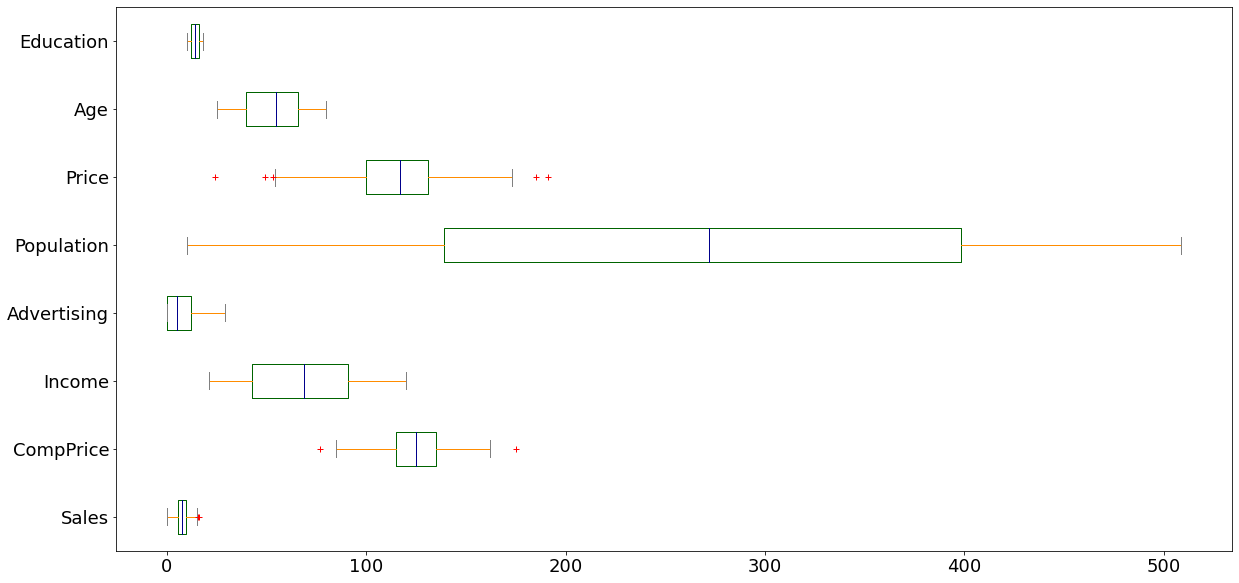

In [1317]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

df_1.plot(kind='box', color=color, vert=False, sym='r+', figsize=(20,10))

In [1318]:
df_1.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [1319]:
y_df_1 = pd.DataFrame(df_1['ShelveLoc'])
X_df_1 = df_1[['Sales', 'CompPrice', 'Income', 'Price', 'Age', 'Education']]

In [1320]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train , y_test=train_test_split(X_df_1,y_df_1,test_size=0.3, random_state=10)

In [1321]:
X_train.head()

,Sales,CompPrice,Income,Price,Age,Education
399,9.71,134,37,120,49,16
25,14.90,139,32,82,54,11
279,3.42,141,57,158,64,18
260,7.67,129,117,101,36,10
130,8.41,94,84,77,51,12


In [1322]:
y_train.head()

,ShelveLoc
399,Good
25,Good
279,Medium
260,Bad
130,Medium


## 2. Split the dataset into your training sample (70%) and test sample (30%)


In [1323]:
df_1.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [1324]:
y_df_1 = pd.DataFrame(df_1['ShelveLoc'])
X_df_1 = df_1[['Sales', 'CompPrice', 'Income', 'Price', 'Age', 'Education']]

In [1325]:
from sklearn.model_selection import train_test_split
X_trainn ,X_testt ,y_trainn , y_testt=train_test_split(X_df_1,y_df_1,test_size=0.3, random_state=10)

In [1326]:
X_trainn.head()

,Sales,CompPrice,Income,Price,Age,Education
399,9.71,134,37,120,49,16
25,14.90,139,32,82,54,11
279,3.42,141,57,158,64,18
260,7.67,129,117,101,36,10
130,8.41,94,84,77,51,12


In [1327]:
y_trainn.head()

,ShelveLoc
399,Good
25,Good
279,Medium
260,Bad
130,Medium


## 3. Fit a logistic regression model using the training sample with all the features and another model using only the best features to predict "Shelveloc" according to your preferred model for feature (subset) selection. Compare the accuracy of both models using the test sample. Discuss your results.


In [1328]:
logreg = LogisticRegression()
logreg.fit(X_trainn,y_trainn)

LogisticRegression()

In [1329]:
predictions = logreg.predict(X_testt)
## Defining predictions
predictions

array(['Medium', 'Medium', 'Good', 'Good', 'Medium', 'Bad', 'Good', 'Bad',
       'Medium', 'Medium', 'Medium', 'Medium', 'Bad', 'Bad', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Good', 'Bad', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Good', 'Medium', 'Bad', 'Good', 'Good', 'Bad',
       'Good', 'Medium', 'Medium', 'Medium', 'Good', 'Medium', 'Bad',
       'Medium', 'Good', 'Medium', 'Medium', 'Medium', 'Good', 'Medium',
       'Bad', 'Good', 'Medium', 'Good', 'Medium', 'Good', 'Good',
       'Medium', 'Good', 'Good', 'Good', 'Medium', 'Bad', 'Medium',
       'Medium', 'Good', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Bad', 'Bad', 'Bad', 'Medium', 'Good', 'Medium', 'Good', 'Medium',
       'Bad', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Good', 'Good', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Bad', 'Bad', 'Medium', 'Mediu

In [1330]:
cm = metrics.confusion_matrix(y_testt, predictions)
print(classification_report(y_testt, predictions, digits=3))

              precision    recall  f1-score   support

         Bad      0.524     0.393     0.449        28
        Good      0.679     0.792     0.731        24
      Medium      0.690     0.721     0.705        68

    accuracy                          0.658       120
   macro avg      0.631     0.635     0.628       120
weighted avg      0.649     0.658     0.650       120



In [1331]:
importance = model.coef_[0]

In [1332]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04602
Feature: 1, Score: 0.01868


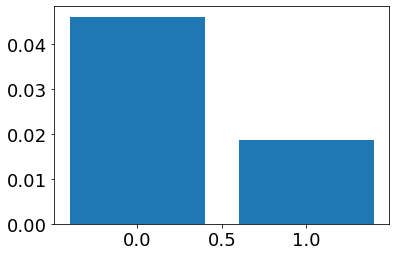

In [1333]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()
## Plotting the

In [1334]:
feature_cols = ['CompPrice','Advertising','Age']
X_2 = df_1[feature_cols] # Features
y_2= df_1.ShelveLoc # Target variable
## Defining X and Y on basis of new and important variable

In [1335]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
## Defining model

In [1336]:
model.fit(X_2, y_2)
## Fitting the model

LogisticRegression(multi_class='multinomial')

In [1337]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [1338]:
n_scores = cross_val_score(model, X_2, y_2, scoring='accuracy', cv=cv, n_jobs=-1)

In [1339]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.547 (0.008)


## 4. Repeat Part 3 using LDA.



In [1340]:
lda = LDA()
model = lda.fit(X_trainn, y_trainn)
print(model.priors_)
## Defining LDA and printing prior probabilities 

[0.24285714 0.21785714 0.53928571]


## 5. Repeat Part 3 using QDA.



In [1341]:
qda = QDA()
model2 = qda.fit(X_trainn, y_trainn)
print(model2.priors_)
## Defining QDA and printing prior probabilities 

[0.24285714 0.21785714 0.53928571]


In [1342]:
pred2=model2.predict(X_testt)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_testt))
print(classification_report(y_testt, pred2, digits=3))
## Printing confusion matrix as well as classification report for QDA

(array(['Bad', 'Good', 'Medium'], dtype=object), array([24, 24, 72], dtype=int64))
[[14  0 10]
 [ 0 20  4]
 [14  4 54]]
              precision    recall  f1-score   support

         Bad      0.583     0.500     0.538        28
        Good      0.833     0.833     0.833        24
      Medium      0.750     0.794     0.771        68

    accuracy                          0.733       120
   macro avg      0.722     0.709     0.714       120
weighted avg      0.728     0.733     0.729       120



## 6. Repeat Part 3 using KNN with K = 1, 2, 3.



In [1343]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_trainn, y_trainn).predict(X_testt)
## Defining KNN and pred

In [1344]:
print(confusion_matrix(y_testt, pred).T)
print(classification_report(y_testt, pred, digits=3))
## Printing confusion matrix as well as classification report for KNN

[[12  3 13]
 [ 5 11  8]
 [11 10 47]]
              precision    recall  f1-score   support

         Bad      0.429     0.429     0.429        28
        Good      0.458     0.458     0.458        24
      Medium      0.691     0.691     0.691        68

    accuracy                          0.583       120
   macro avg      0.526     0.526     0.526       120
weighted avg      0.583     0.583     0.583       120



## 7. Which of these methods in Parts 3, 4, 5, and 6 appears to provide the best results on this data? You can build a table comparing the accuracy of all the models. Explain your answer





In [1345]:
#KNN is the best fit for predicting the results. 

# Question 4

## 1. Write a function in Python to calculate the parameters from a linear regression on a data set of $n$ predictors.  You can assume all the predictors and the prediction is numeric.  Include in the output the standard error of your variables.  You cannot use the function sm.OLS.from_formula() or any of the other built-in regression functions of Python.  

In [1346]:
df_2 = pd.read_csv('C:/Users/kumar/Downloads/VTIreturns.csv', index_col = 0).dropna()

In [1347]:
df_3= df_2.reset_index()
df_3

,Date,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5
0,8/17/2015,0.635918,0.60,0.36,-0.85,-0.22,-0.37,0.379802,-0.139131,0.102001,-0.905078,1.239611
1,8/18/2015,-0.257553,-0.35,-0.61,0.37,0.37,0.03,0.635918,0.379802,-0.139131,0.102001,-0.905078
2,8/19/2015,-0.897452,-0.85,-0.20,-0.21,-0.10,-0.03,-0.257553,0.635918,0.379802,-0.139131,0.102001
3,8/20/2015,-2.198697,-2.24,-0.23,0.56,0.63,0.53,-0.897452,-0.257553,0.635918,0.379802,-0.139131
4,8/21/2015,-2.920836,-2.95,1.80,0.16,-0.73,0.74,-2.198697,-0.897452,-0.257553,0.635918,0.379802
...,...,...,...,...,...,...,...,...,...,...,...,...
1534,9/24/2021,0.119389,0.08,-0.39,0.70,0.62,0.23,1.211179,1.003614,-0.008889,-1.748518,-0.804474
1535,9/27/2021,-0.217969,-0.10,1.73,2.39,-0.27,0.76,0.119389,1.211179,1.003614,-0.008889,-1.748518
1536,9/28/2021,-2.117043,-2.18,0.01,1.75,0.84,1.07,-0.217969,0.119389,1.211179,1.003614,-0.008889
1537,9/29/2021,0.066844,0.03,-0.18,0.80,1.15,0.35,-2.117043,-0.217969,0.119389,1.211179,1.003614


In [1348]:
df_3['Date'] = pd.to_datetime(df_3['Date'])
df_3

,Date,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5
0,2015-08-17,0.635918,0.60,0.36,-0.85,-0.22,-0.37,0.379802,-0.139131,0.102001,-0.905078,1.239611
1,2015-08-18,-0.257553,-0.35,-0.61,0.37,0.37,0.03,0.635918,0.379802,-0.139131,0.102001,-0.905078
2,2015-08-19,-0.897452,-0.85,-0.20,-0.21,-0.10,-0.03,-0.257553,0.635918,0.379802,-0.139131,0.102001
3,2015-08-20,-2.198697,-2.24,-0.23,0.56,0.63,0.53,-0.897452,-0.257553,0.635918,0.379802,-0.139131
4,2015-08-21,-2.920836,-2.95,1.80,0.16,-0.73,0.74,-2.198697,-0.897452,-0.257553,0.635918,0.379802
...,...,...,...,...,...,...,...,...,...,...,...,...
1534,2021-09-24,0.119389,0.08,-0.39,0.70,0.62,0.23,1.211179,1.003614,-0.008889,-1.748518,-0.804474
1535,2021-09-27,-0.217969,-0.10,1.73,2.39,-0.27,0.76,0.119389,1.211179,1.003614,-0.008889,-1.748518
1536,2021-09-28,-2.117043,-2.18,0.01,1.75,0.84,1.07,-0.217969,0.119389,1.211179,1.003614,-0.008889
1537,2021-09-29,0.066844,0.03,-0.18,0.80,1.15,0.35,-2.117043,-0.217969,0.119389,1.211179,1.003614


In [1349]:
x = df_3.drop(columns=['ret','Date'])
y = df_3.ret

In [1350]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)

In [1351]:
   n = np.size(x)

In [1352]:
m_x = np.mean(x)
m_y = np.mean(y)

In [1353]:
SS_xy = np.sum(y*x) - n*m_y*m_x
SS_xx = np.sum(x*x) - n*m_x*m_x

In [1354]:
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x

In [1355]:
b_1

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
Lag4    -0.022386
Lag5    -0.022674
RM-Rf   -0.022158
RMW     -0.024795
SMB     -0.000991
Length: 1549, dtype: float64

## 2. Compare the output of your function to that of the sm.OLS.from_formula() function.



In [1356]:
x = sm.add_constant(x)
model = sm.OLS(x,y)
results = model.fit()
results.params

,0,1,2,3,4,5,6,7,8,9,10
ret,0.038993,1.004974,0.107177,0.095396,-0.020938,-0.05567,-0.175696,0.146734,-0.006289,-0.081004,0.08197
